In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import  matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_dataset(file_path):

    """
    Load a dataset from a SAS XPORT file into a pandas DataFrame.
    
    Parameters:
    -----------
    file_path : str
        Path to the SAS XPORT (.xpt) file to be loaded.
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame containing the data from the SAS XPORT file.
    """
    return pd.read_sas(file_path, format="xport")


In [5]:
# Load blood pressure (BP) data from SAS XPORT file 'BPXO_L.xpt' into a DataFrame
# The dataset contains longitudinal blood pressure measurements from NHANES
bp_data= load_dataset("BPXO_L.xpt")
bp_data

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7796,142306.0,b'R',2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7797,142307.0,b'R',4.0,127.0,75.0,132.0,73.0,131.0,72.0,71.0,70.0,67.0
7798,142308.0,b'R',3.0,106.0,65.0,106.0,69.0,112.0,74.0,58.0,61.0,69.0
7799,142309.0,b'R',3.0,127.0,81.0,125.0,82.0,128.0,81.0,80.0,79.0,83.0


In [7]:
# Load NHANES demographic data from 'DEMO_L.xpt' into a DataFrame
# Contains participant background information including:
# - Age, gender, race/ethnicity
# - Education level, income, and other socioeconomic factors
# - Survey weights for population-level analysis
# - Participant identifiers for merging with other NHANES datasets
demo_data= load_dataset("DEMO_L.xpt")
demo_data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,142306.0,12.0,2.0,1.0,9.0,NaN,2.0,2.0,1.0,111.0,...,1.0,3.0,3.0,3.0,NaN,11147.192563,13459.129019,176.0,1.0,2.01
11929,142307.0,12.0,2.0,2.0,49.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,69419.620456,64962.328962,181.0,1.0,NaN
11930,142308.0,12.0,2.0,1.0,50.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,32696.313477,44367.534132,183.0,2.0,1.95
11931,142309.0,12.0,2.0,1.0,40.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,30547.974564,46249.361849,176.0,1.0,3.11


In [9]:
# Load serum ferritin test results (iron storage biomarker
fertin_data= load_dataset("FERTIN_L.xpt")
fertin_data

,SEQN,WTPH2YR,LBXFER,LBDFERSI
0,130380.0,8.532884e+04,13.30,13.30
1,130381.0,5.397605e-79,NaN,NaN
2,130382.0,5.963893e+04,24.40,24.40
3,130388.0,3.286429e+04,NaN,NaN
4,130390.0,6.142701e+04,52.10,52.10
...,...,...,...,...
2559,142280.0,6.639765e+04,66.40,66.40
2560,142282.0,5.397605e-79,NaN,NaN
2561,142283.0,1.527882e+05,31.60,31.60
2562,142300.0,3.147068e+04,5.69,5.69


In [11]:
insurance_data= load_dataset("HIQ_L.xpt")
# insurance_data = insurance_data.drop(['HIQ032C', 'HIQ032E', 'HIQ032F','HIQ032H','HIQ032I' ], axis=1)
# insurance_data = insurance_data.dropna()
insurance_data

,SEQN,HIQ011,HIQ032A,HIQ032B,HIQ032C,HIQ032D,HIQ032E,HIQ032F,HIQ032H,HIQ032I,HIQ210
0,130378.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,130379.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,130380.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,1.0
3,130381.0,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0
4,130382.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11928,142306.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11929,142307.0,1.0,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0
11930,142308.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
11931,142309.0,1.0,1.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,2.0


In [13]:
creactive_data= load_dataset("HSCRP_L.xpt")
# creactive_data= creactive_data.dropna()
creactive_data


,SEQN,WTPH2YR,LBXHSCRP,LBDHRPLC
0,130378.0,5.604213e+04,1.78,5.397605e-79
1,130379.0,3.743571e+04,2.03,5.397605e-79
2,130380.0,8.532884e+04,5.62,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN
...,...,...,...,...
8722,142306.0,5.397605e-79,NaN,NaN
8723,142307.0,6.899418e+04,4.30,5.397605e-79
8724,142308.0,5.397605e-79,NaN,NaN
8725,142309.0,4.628442e+04,0.53,5.397605e-79


In [15]:
kidneyCondition_data = load_dataset("KIQ_U_L.xpt")
# kidneyCondition_data = kidneyCondition_data.drop(['KIQ025', 'KIQ010', 'KIQ052'], axis=1)
# kidneyCondition_data = kidneyCondition_data.dropna()
kidneyCondition_data

,SEQN,KIQ022,KIQ025,KIQ005,KIQ010,KIQ042,KIQ044,KIQ052,KIQ481
0,130378.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,2.0,NaN,2.0,2.0,1.0,2.0,2.0,2.000000e+00
2,130380.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,2.000000e+00
3,130384.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130385.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7804,142305.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7805,142307.0,2.0,NaN,5.0,3.0,1.0,1.0,4.0,5.397605e-79
7806,142308.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,5.397605e-79
7807,142309.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,2.000000e+00


In [17]:
# Load NHANES body composition data (BMX_L.xpt) containing:
# - Anthropometric measurements: height, weight, BMI
# - Body mass index (BMI) percentiles
# - Waist circumference and other body measures
# - Examination conditions and quality control flags
BDmass_data= load_dataset("BMX_L.xpt")

# Load NHANES vitamin D laboratory data (VID_L.xpt) containing:
# - Serum vitamin D levels (25-hydroxyvitamin D in nmol/L)
# - Includes both D2 and D3 forms
# - Related nutritional status biomarkers
# - Laboratory method and quality control data
vitD_data= load_dataset('VID_L.xpt')

# Load NHANES pregnancy test data (UCPREG_L.xpt) containing:
# - Urine pregnancy test results (positive/negative)
# - Participant-reported pregnancy status
# - Women's health reproductive variables
# - Important for exclusion criteria in many analyses
Preg_data= load_dataset('UCPREG_L.xpt')

# Pregnancy data preview:
# - Contains sensitive health information (handle with confidentiality)
# - Often used to exclude pregnant participants from certain analyses
# - Should be merged with demographic data for proper interpretation
Preg_data

,SEQN,URXPREG
0,130380.0,2.0
1,130388.0,2.0
2,130390.0,2.0
3,130391.0,2.0
4,130395.0,2.0
...,...,...
1129,142208.0,2.0
1130,142263.0,2.0
1131,142269.0,2.0
1132,142280.0,2.0


In [19]:
# Merge multiple NHANES datasets sequentially using SEQN (unique participant ID)
# Creates comprehensive analytic dataset with demographics, biomarkers, and health measures

# Start with core demographic data and merge with:
data = demo_data.merge(fertin_data, on='SEQN')  # Iron status biomarkers (ferritin)
data = data.merge(creactive_data, on='SEQN')    # Inflammation marker (CRP)
data = data.merge(kidneyCondition_data, on='SEQN')  # Renal function indicators
data = data.merge(insurance_data, on='SEQN')    # Healthcare access variables
data = data.merge(vitD_data, on='SEQN')         # Vitamin D nutritional status
data = data.merge(BDmass_data, on='SEQN')       # Body composition measures
data = data.merge(Preg_data, on='SEQN')         # Pregnancy status

data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,URXPREG
0,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,35.5,NaN,36.3,NaN,93.5,NaN,98.0,NaN,2.0
1,130388.0,12.0,2.0,2.0,27.0,NaN,4.0,4.0,1.0,NaN,...,NaN,39.5,NaN,45.7,NaN,118.5,NaN,134.0,NaN,2.0
2,130390.0,12.0,2.0,2.0,31.0,NaN,3.0,3.0,2.0,NaN,...,NaN,40.4,NaN,46.0,NaN,131.0,NaN,138.5,NaN,2.0
3,130391.0,12.0,2.0,2.0,33.0,NaN,3.0,3.0,2.0,NaN,...,NaN,38.0,NaN,41.8,NaN,123.8,NaN,138.9,NaN,2.0
4,130395.0,12.0,2.0,2.0,33.0,NaN,5.0,7.0,2.0,NaN,...,NaN,36.0,NaN,45.2,NaN,142.5,NaN,146.1,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,NaN,3.0,3.0,1.0,NaN,...,NaN,36.5,NaN,36.0,NaN,104.4,NaN,110.0,NaN,2.0
1130,142263.0,12.0,2.0,2.0,44.0,NaN,3.0,3.0,2.0,NaN,...,NaN,33.3,NaN,26.3,NaN,80.4,NaN,95.0,NaN,2.0
1131,142269.0,12.0,2.0,2.0,32.0,NaN,4.0,4.0,2.0,NaN,...,NaN,38.0,NaN,53.1,NaN,149.3,NaN,147.2,NaN,2.0
1132,142280.0,12.0,2.0,2.0,23.0,NaN,5.0,7.0,2.0,NaN,...,NaN,39.7,NaN,36.4,NaN,124.1,NaN,130.0,NaN,2.0


In [21]:
# Remove duplicate participant records based on SEQN (unique ID)
# Ensures one record per participant in the final analytic dataset
data= data.drop_duplicates(subset='SEQN')

In [23]:
missing_percent = data.isnull().mean()
cols_to_drop= missing_percent[missing_percent>0.5].index.tolist()
data= data.drop(columns=cols_to_drop)

In [25]:
data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,BMDSTATS,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMXHIP,URXPREG
0,130380.0,12.0,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,...,1.0,69.4,152.9,29.7,38.5,35.5,36.3,93.5,98.0,2.0
1,130388.0,12.0,2.0,2.0,27.0,4.0,4.0,1.0,2.0,1.0,...,1.0,123.7,168.2,43.7,40.0,39.5,45.7,118.5,134.0,2.0
2,130390.0,12.0,2.0,2.0,31.0,3.0,3.0,2.0,1.0,1.0,...,1.0,122.7,163.3,46.0,34.0,40.4,46.0,131.0,138.5,2.0
3,130391.0,12.0,2.0,2.0,33.0,3.0,3.0,2.0,2.0,1.0,...,1.0,116.3,172.8,38.9,35.6,38.0,41.8,123.8,138.9,2.0
4,130395.0,12.0,2.0,2.0,33.0,5.0,7.0,2.0,2.0,1.0,...,1.0,138.4,159.2,54.6,36.2,36.0,45.2,142.5,146.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,3.0,3.0,1.0,2.0,1.0,...,1.0,88.1,159.0,34.8,35.5,36.5,36.0,104.4,110.0,2.0
1130,142263.0,12.0,2.0,2.0,44.0,3.0,3.0,2.0,2.0,1.0,...,1.0,61.3,164.8,22.6,37.0,33.3,26.3,80.4,95.0,2.0
1131,142269.0,12.0,2.0,2.0,32.0,4.0,4.0,2.0,2.0,1.0,...,3.0,152.4,NaN,NaN,39.5,38.0,53.1,149.3,147.2,2.0
1132,142280.0,12.0,2.0,2.0,23.0,5.0,7.0,2.0,2.0,1.0,...,1.0,112.9,171.4,38.4,41.6,39.7,36.4,124.1,130.0,2.0


In [27]:
# Handle missing values in numeric columns using median imputation
# This preserves the data distribution while addressing missingness

# 1. Identify all numeric columns (int64 and float64 dtypes)
numeric_cols= data.select_dtypes(include=['int64', 'float64']).columns

# 2. Initialize SimpleImputer with median strategy:
#    - Median is robust to outliers (better than mean for NHANES health data)
#    - Creates a separate imputer instance for potential reuse
num_imputer= SimpleImputer(strategy='median')

# 3. Apply imputation to selected columns:
#    - fit_transform() learns medians AND imputes in one step
#    - Operates on all numeric cols simultaneously for efficiency
data[numeric_cols]= num_imputer.fit_transform(data[numeric_cols])

In [29]:
data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,BMDSTATS,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMXHIP,URXPREG
0,130380.0,12.0,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,...,1.0,69.4,152.9,29.7,38.5,35.5,36.3,93.5,98.0,2.0
1,130388.0,12.0,2.0,2.0,27.0,4.0,4.0,1.0,2.0,1.0,...,1.0,123.7,168.2,43.7,40.0,39.5,45.7,118.5,134.0,2.0
2,130390.0,12.0,2.0,2.0,31.0,3.0,3.0,2.0,1.0,1.0,...,1.0,122.7,163.3,46.0,34.0,40.4,46.0,131.0,138.5,2.0
3,130391.0,12.0,2.0,2.0,33.0,3.0,3.0,2.0,2.0,1.0,...,1.0,116.3,172.8,38.9,35.6,38.0,41.8,123.8,138.9,2.0
4,130395.0,12.0,2.0,2.0,33.0,5.0,7.0,2.0,2.0,1.0,...,1.0,138.4,159.2,54.6,36.2,36.0,45.2,142.5,146.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,3.0,3.0,1.0,2.0,1.0,...,1.0,88.1,159.0,34.8,35.5,36.5,36.0,104.4,110.0,2.0
1130,142263.0,12.0,2.0,2.0,44.0,3.0,3.0,2.0,2.0,1.0,...,1.0,61.3,164.8,22.6,37.0,33.3,26.3,80.4,95.0,2.0
1131,142269.0,12.0,2.0,2.0,32.0,4.0,4.0,2.0,2.0,1.0,...,3.0,152.4,162.7,28.1,39.5,38.0,53.1,149.3,147.2,2.0
1132,142280.0,12.0,2.0,2.0,23.0,5.0,7.0,2.0,2.0,1.0,...,1.0,112.9,171.4,38.4,41.6,39.7,36.4,124.1,130.0,2.0


In [33]:
# Filter dataset to exclude male participants (RIAGENDR = 1.0)
# Retains only female participants (RIAGENDR = 2.0) for gender-specific analysis
filtered_data= data[data['RIAGENDR']!= 1.0]
filtered_data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMQMILIZ,DMDBORN4,...,BMDSTATS,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,BMXHIP,URXPREG
0,130380.0,12.0,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,...,1.0,69.4,152.9,29.7,38.5,35.5,36.3,93.5,98.0,2.0
1,130388.0,12.0,2.0,2.0,27.0,4.0,4.0,1.0,2.0,1.0,...,1.0,123.7,168.2,43.7,40.0,39.5,45.7,118.5,134.0,2.0
2,130390.0,12.0,2.0,2.0,31.0,3.0,3.0,2.0,1.0,1.0,...,1.0,122.7,163.3,46.0,34.0,40.4,46.0,131.0,138.5,2.0
3,130391.0,12.0,2.0,2.0,33.0,3.0,3.0,2.0,2.0,1.0,...,1.0,116.3,172.8,38.9,35.6,38.0,41.8,123.8,138.9,2.0
4,130395.0,12.0,2.0,2.0,33.0,5.0,7.0,2.0,2.0,1.0,...,1.0,138.4,159.2,54.6,36.2,36.0,45.2,142.5,146.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,3.0,3.0,1.0,2.0,1.0,...,1.0,88.1,159.0,34.8,35.5,36.5,36.0,104.4,110.0,2.0
1130,142263.0,12.0,2.0,2.0,44.0,3.0,3.0,2.0,2.0,1.0,...,1.0,61.3,164.8,22.6,37.0,33.3,26.3,80.4,95.0,2.0
1131,142269.0,12.0,2.0,2.0,32.0,4.0,4.0,2.0,2.0,1.0,...,3.0,152.4,162.7,28.1,39.5,38.0,53.1,149.3,147.2,2.0
1132,142280.0,12.0,2.0,2.0,23.0,5.0,7.0,2.0,2.0,1.0,...,1.0,112.9,171.4,38.4,41.6,39.7,36.4,124.1,130.0,2.0


In [37]:
#Display columns 
filtered_data.columns

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'RIDRETH3', 'RIDEXMON', 'DMQMILIZ', 'DMDBORN4', 'DMDEDUC2', 'DMDMARTZ',
       'RIDEXPRG', 'DMDHHSIZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVSTRA', 'SDMVPSU',
       'INDFMPIR', 'WTPH2YR_x', 'LBXFER', 'LBDFERSI', 'WTPH2YR_y', 'LBXHSCRP',
       'LBDHRPLC', 'KIQ022', 'KIQ005', 'KIQ042', 'KIQ044', 'KIQ481', 'HIQ011',
       'HIQ032A', 'HIQ210', 'WTPH2YR', 'LBXVIDMS', 'LBDVIDLC', 'LBXVD2MS',
       'LBDVD2LC', 'LBXVD3MS', 'LBDVD3LC', 'LBXVE3MS', 'LBDVE3LC', 'BMDSTATS',
       'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST',
       'BMXHIP', 'URXPREG'],
      dtype='object')

In [41]:
x= filtered_data.drop(columns=['HIQ011','HIQ032A','HIQ210']) # All columns except insurance-related
y= filtered_data[['HIQ011','HIQ032A','HIQ210']] # Target insurance variables

In [43]:
# Print feature and target data with clear separation
print("\nFeature variables (x) shape:", x.shape)
print("First 5 rows of features:")
print(x.head())  # Show sample instead of full dataframe


Feature variables (x) shape: (1134, 49)
First 5 rows of features:
       SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDRETH1  RIDRETH3  \
0  130380.0      12.0       2.0       2.0      44.0       2.0       2.0   
1  130388.0      12.0       2.0       2.0      27.0       4.0       4.0   
2  130390.0      12.0       2.0       2.0      31.0       3.0       3.0   
3  130391.0      12.0       2.0       2.0      33.0       3.0       3.0   
4  130395.0      12.0       2.0       2.0      33.0       5.0       7.0   

   RIDEXMON  DMQMILIZ  DMDBORN4  ...  BMDSTATS  BMXWT  BMXHT  BMXBMI  BMXLEG  \
0       1.0       2.0       2.0  ...       1.0   69.4  152.9    29.7    38.5   
1       1.0       2.0       1.0  ...       1.0  123.7  168.2    43.7    40.0   
2       2.0       1.0       1.0  ...       1.0  122.7  163.3    46.0    34.0   
3       2.0       2.0       1.0  ...       1.0  116.3  172.8    38.9    35.6   
4       2.0       2.0       1.0  ...       1.0  138.4  159.2    54.6    36.2   

 

In [45]:
# Calculate summary statistics for the entire dataset (original 'data')
# Note: This operates on the pre-filtered dataset
print("\nSummary statistics for original dataset:")
print(data.select_dtypes(include=['number']).sum())  # Only numeric columns


Summary statistics for original dataset:
SEQN         1.547371e+08
SDDSRVYR     1.360800e+04
RIDSTATR     2.268000e+03
RIAGENDR     2.268000e+03
RIDAGEYR     3.756100e+04
RIDRETH1     3.514000e+03
RIDRETH3     3.739000e+03
RIDEXMON     1.710000e+03
DMQMILIZ     2.243000e+03
DMDBORN4     1.387000e+03
DMDEDUC2     4.577000e+03
DMDMARTZ     2.193000e+03
RIDEXPRG     2.255000e+03
DMDHHSIZ     3.721000e+03
WTINT2YR     4.181708e+07
WTMEC2YR     5.497164e+07
SDMVSTRA     2.042810e+05
SDMVPSU      1.721000e+03
INDFMPIR     2.872350e+03
WTPH2YR_x    5.487146e+07
LBXFER       7.084888e+04
LBDFERSI     7.084888e+04
WTPH2YR_y    5.487146e+07
LBXHSCRP     5.322110e+03
LBDHRPLC     9.000000e+00
KIQ022       2.253000e+03
KIQ005       1.820000e+03
KIQ042       1.871000e+03
KIQ044       2.033000e+03
KIQ481       1.366000e+03
HIQ011       1.263000e+03
HIQ032A      2.854000e+03
HIQ210       2.196000e+03
WTPH2YR      5.487146e+07
LBXVIDMS     7.660133e+04
LBDVIDLC     6.120884e-76
LBXVD2MS     4.529180e

In [47]:
# Standardize features using StandardScaler (z-score normalization)
# This transforms features to have mean=0 and std=1, important for many ML algorithms

# Initialize the scaler
scaler= StandardScaler()

# Fit the scaler to features (x) and transform in one step
# Note: Only applies to numeric columns, automatically skips non-numeric
x_scaled= scaler.fit_transform(x)

In [49]:
# Generate polynomial features (degree=2) for the scaled features
# This creates interaction terms and quadratic features for non-linear relationships

# Initialize polynomial feature transformer:
# - degree=2: Creates both quadratic and interaction terms
# - include_bias=False: Omits the constant bias term (intercept)
poly= PolynomialFeatures(degree=2, include_bias=False)

# Transform the scaled features to include polynomial terms
x_poly= poly.fit_transform(x_scaled)

In [51]:
# Split polynomial features and target into training (70%) and test (30%) sets
# Important considerations for NHANES data:
# 1. Preserves class distribution in y (stratified by default if y is categorical)
# 2. random_state=42 ensures reproducibility
# 3. Test size of 30% is common for medium-sized datasets

x_train, x_test, y_train, y_test = train_test_split(
    x_poly,                # Polynomial features (interactions + quadratic terms)
    y,                     # Target variables (insurance-related)
    test_size=0.3,         # 30% held out for testing
    random_state=42,       # Seed for reproducibility
)

In [53]:
# Display X_trsain and Y_train
print(x_train, y_train)

[[ 1.05523126e+00  0.00000000e+00  0.00000000e+00 ...  9.65843547e-03
  -1.22350631e-02  1.54990701e-02]
 [ 1.15891797e+00  0.00000000e+00  0.00000000e+00 ...  2.27067444e+00
  -1.87598887e-01  1.54990701e-02]
 [-1.50236977e-01  0.00000000e+00  0.00000000e+00 ...  1.04584845e-01
  -4.02612449e-02  1.54990701e-02]
 ...
 [ 1.70672457e+00  0.00000000e+00  0.00000000e+00 ...  9.34298955e-01
  -1.20336050e-01  1.54990701e-02]
 [ 9.04841458e-01  0.00000000e+00  0.00000000e+00 ...  1.33808544e+01
   4.55401800e-01  1.54990701e-02]
 [ 1.67206442e+00  0.00000000e+00  0.00000000e+00 ...  5.57830598e-02
   2.94038357e-02  1.54990701e-02]]       HIQ011  HIQ032A  HIQ210
911      2.0      1.0     2.0
959      1.0      1.0     2.0
486      1.0      1.0     2.0
1034     2.0      1.0     2.0
704      1.0      1.0     2.0
...      ...      ...     ...
1044     1.0      1.0     2.0
1095     1.0      1.0     2.0
1130     1.0      1.0     2.0
860      1.0      1.0     2.0
1126     2.0      1.0     2.0

[79

In [55]:
# Initialize base logistic regression model
# - max_iter=1000 ensures convergence for complex NHANES data
# - Increased from default 100 to handle potential complexity
base_model= LogisticRegression(max_iter=1000)

# Wrap in MultiOutputClassifier to predict all three insurance-related targets:
model= MultiOutputClassifier(base_model)

# Train model on polynomial features
# Note: NHANES survey weights not included here - consider sample_weight if needed
model.fit(x_train,y_train)

# Generate predictions on test set
y_pred= model.predict(x_test)

In [57]:
# Evaluate multi-target model performance with comprehensive metrics
print("🔍 Model Performance Evaluation (NHANES Insurance Outcomes)")

# 1. Individual Target Accuracy Scores
print("\n🎯 Accuracy per Target Variable:")
for i, col in enumerate(y.columns):
    acc = accuracy_score(y_test[col], y_pred[:, i])
    print(f"• {col:<8}: {acc:.4f} ({sum(y_test[col] == y_pred[:,i])}/{len(y_test)})")

# 2. Detailed Classification Reports
for i, col in enumerate(y.columns):
    print(f"\n📊 Classification Report for '{col}':")
    print("="*50)
    print(classification_report(
        y_test[col], 
        y_pred[:, i],
        zero_division=1,  # Handle potential undefined metrics
        target_names=[f"Class {x}" for x in sorted(y_test[col].unique())]
    ))

🔍 Model Performance Evaluation (NHANES Insurance Outcomes)

🎯 Accuracy per Target Variable:
• HIQ011  : 0.8299 (283/341)
• HIQ032A : 0.9795 (334/341)
• HIQ210  : 0.8886 (303/341)

📊 Classification Report for 'HIQ011':
              precision    recall  f1-score   support

   Class 1.0       0.91      0.90      0.90       307
   Class 2.0       0.18      0.21      0.19        34

    accuracy                           0.83       341
   macro avg       0.55      0.55      0.55       341
weighted avg       0.84      0.83      0.83       341


📊 Classification Report for 'HIQ032A':
              precision    recall  f1-score   support

   Class 1.0       0.99      0.99      0.99       338
  Class 77.0       1.00      0.00      0.00         2
  Class 99.0       0.00      0.00      0.00         1

    accuracy                           0.98       341
   macro avg       0.66      0.33      0.33       341
weighted avg       0.99      0.98      0.98       341


📊 Classification Report for 'HIQ2

In [67]:
# 3. Confusion Matrix Visualization
cm = confusion_matrix(y_test[col], y_pred[:, i])
print("🧮 Confusion Matrix:")
print(cm)
    
    # 4. NHANES-Specific Considerations
if i == 0:
    print("\n💡 NHANES Analysis Notes:")
    print("- Consider survey weights in evaluation metrics")
    print("- Account for complex sampling design in significance testing")
    print("- Review prevalence rates against population benchmarks")

🧮 Confusion Matrix:
[[  4  17   0]
 [ 20 299   0]
 [  0   1   0]]


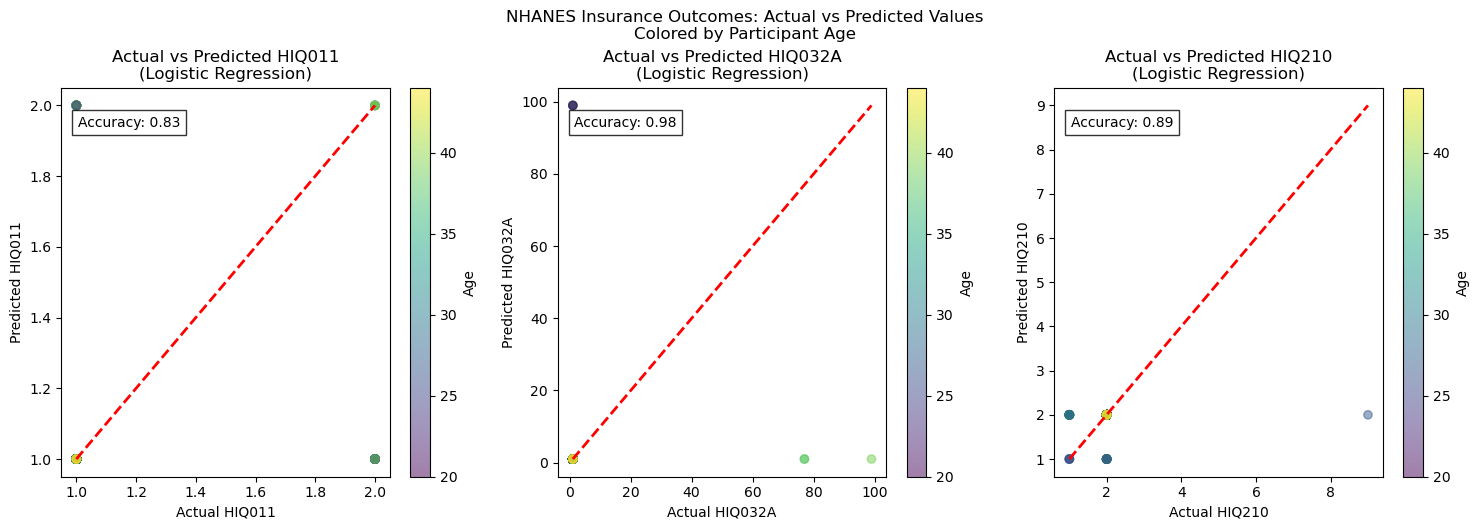


Recommended Additional Plots:
- Weighted accuracy plots using survey weights
- Confusion matrices for each outcome
- ROC curves for binary classification tasks
- Demographic breakdowns of prediction errors


In [69]:
# Create a figure with subplots for each target variable
plt.figure(figsize=(15, 5))

# Get target variable names
target_names = y.columns

for i, col in enumerate(target_names):
    plt.subplot(1, len(target_names), i+1)
    
    # Scatter plot of actual vs predicted with NHANES-specific adjustments
    plt.scatter(y_test[col], y_pred[:,i], alpha=0.5, 
               c=filtered_data.loc[y_test.index, 'RIDAGEYR'],  # Color by age
               cmap='viridis')
    
    # Perfect prediction line
    plt.plot([y_test[col].min(), y_test[col].max()], 
             [y_test[col].min(), y_test[col].max()], 
             'r--', lw=2)
    
    # NHANES-specific formatting
    plt.xlabel(f"Actual {col}")
    plt.ylabel(f"Predicted {col}")
    plt.title(f"Actual vs Predicted {col}\n(Logistic Regression)")
    plt.colorbar(label='Age')
    
    # Add accuracy score to plot
    acc = accuracy_score(y_test[col], y_pred[:,i])
    plt.text(0.05, 0.9, f'Accuracy: {acc:.2f}', 
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()

# NHANES-Specific Annotations
plt.suptitle("NHANES Insurance Outcomes: Actual vs Predicted Values\n"
            "Colored by Participant Age", y=1.05)
plt.show()

# Additional recommended visualizations
print("\nRecommended Additional Plots:")
print("- Weighted accuracy plots using survey weights")
print("- Confusion matrices for each outcome")
print("- ROC curves for binary classification tasks")
print("- Demographic breakdowns of prediction errors")

📊 Found 45 numeric features for visualization


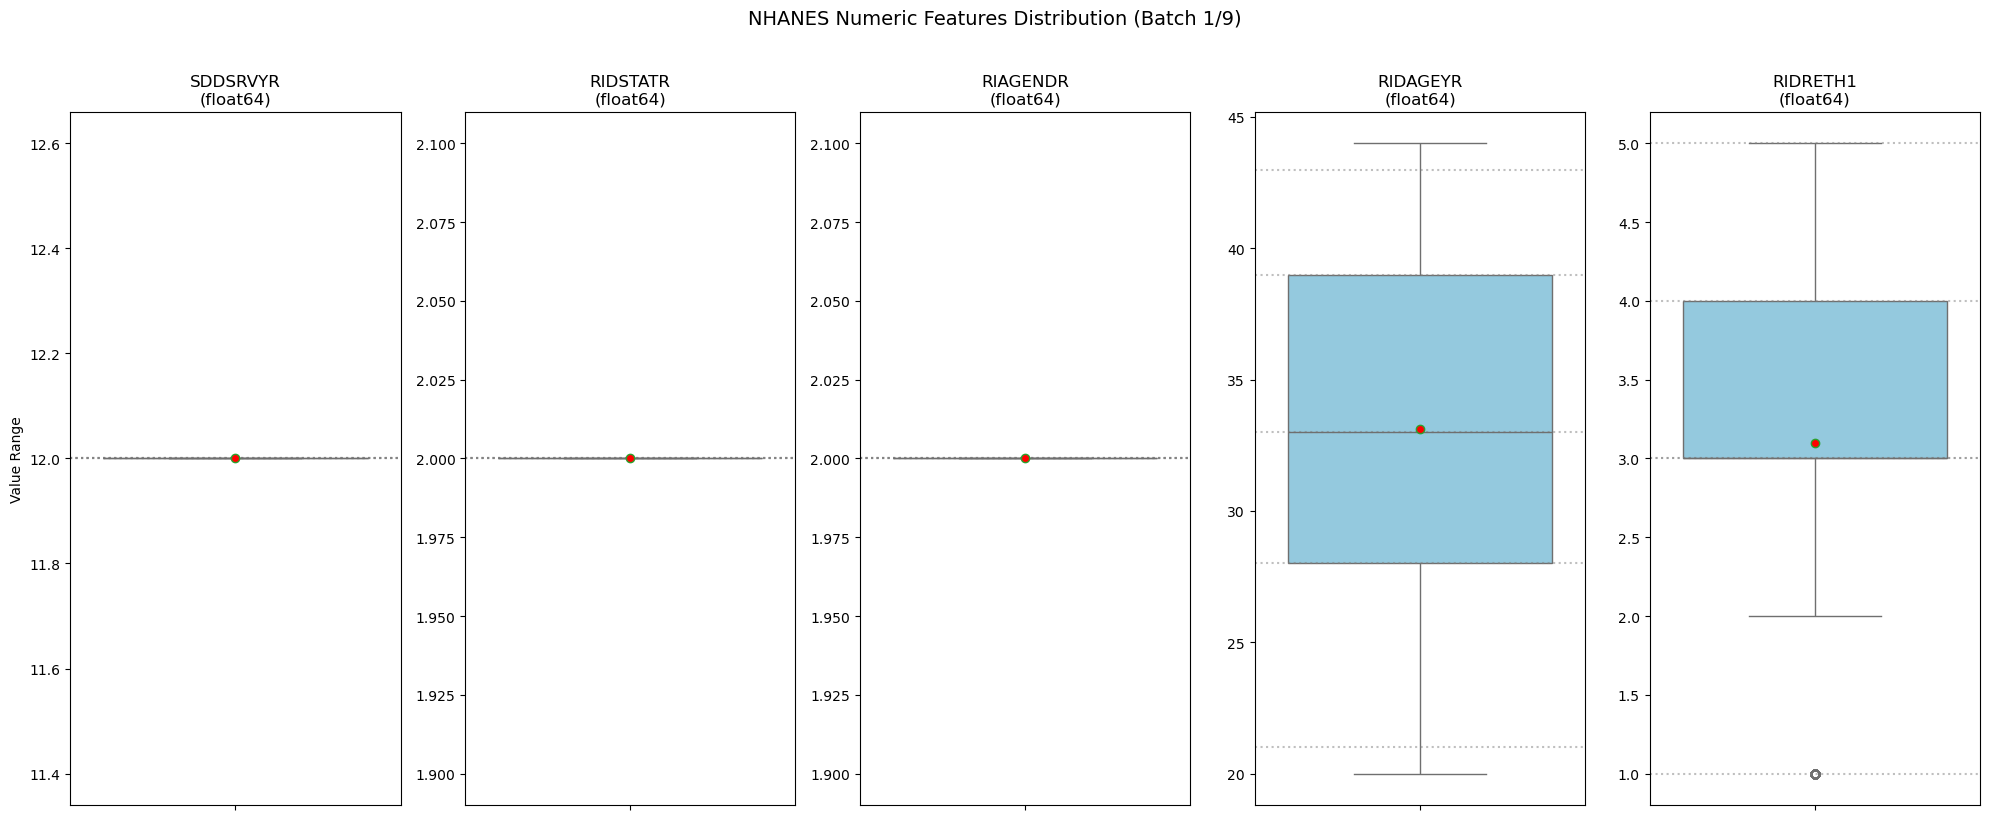


📈 Statistical Summary for Batch 1:
               mean       std   min   25%   50%   75%   max
SDDSRVYR  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0
RIDSTATR   2.000000  0.000000   2.0   2.0   2.0   2.0   2.0
RIAGENDR   2.000000  0.000000   2.0   2.0   2.0   2.0   2.0
RIDAGEYR  33.122575  6.866265  20.0  28.0  33.0  39.0  44.0
RIDRETH1   3.098765  1.092758   1.0   3.0   3.0   4.0   5.0


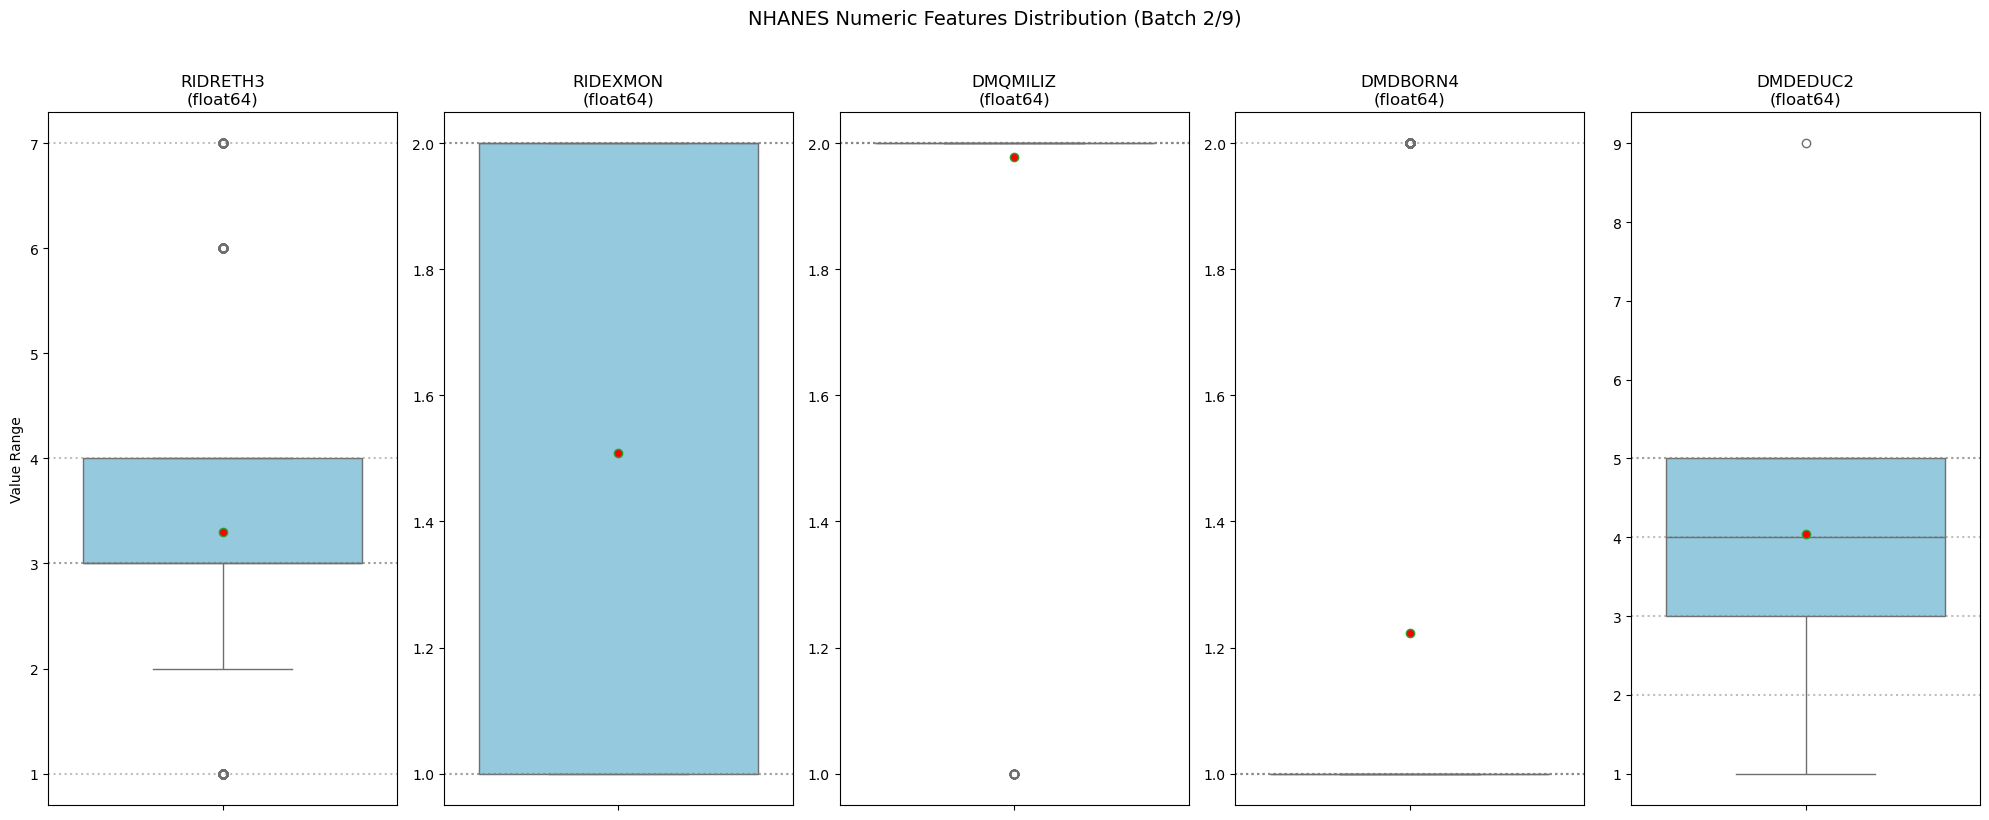


📈 Statistical Summary for Batch 2:
              mean       std  min  25%  50%  75%  max
RIDRETH3  3.297178  1.495758  1.0  3.0  3.0  4.0  7.0
RIDEXMON  1.507937  0.500158  1.0  1.0  2.0  2.0  2.0
DMQMILIZ  1.977954  0.146897  1.0  2.0  2.0  2.0  2.0
DMDBORN4  1.223104  0.416511  1.0  1.0  1.0  1.0  2.0
DMDEDUC2  4.036155  1.056864  1.0  3.0  4.0  5.0  9.0


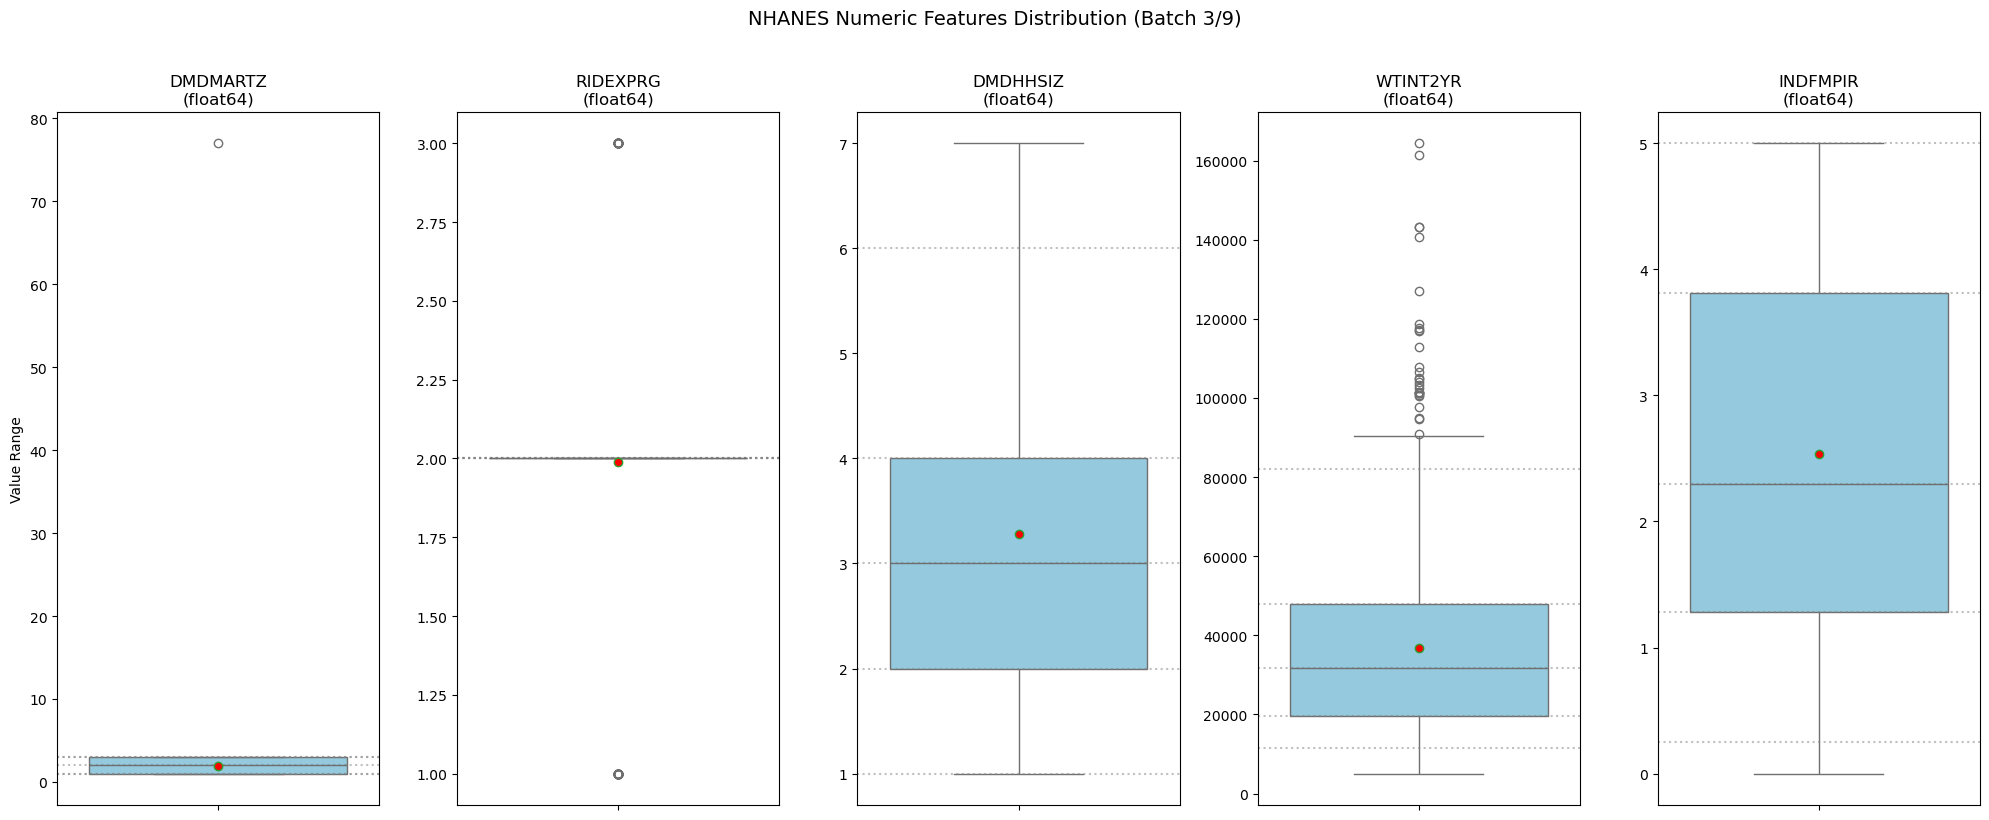


📈 Statistical Summary for Batch 3:
                  mean           std           min           25%  \
DMDMARTZ      1.933862      2.413561  1.000000e+00      1.000000   
RIDEXPRG      1.988536      0.246513  1.000000e+00      2.000000   
DMDHHSIZ      3.281305      1.567899  1.000000e+00      2.000000   
WTINT2YR  36875.731202  22773.755855  5.055389e+03  19585.520336   
INDFMPIR      2.532937      1.548714  5.397605e-79      1.282500   

                   50%           75%            max  
DMDMARTZ      2.000000      3.000000      77.000000  
RIDEXPRG      2.000000      2.000000       3.000000  
DMDHHSIZ      3.000000      4.000000       7.000000  
WTINT2YR  31709.111705  47971.585972  164370.341365  
INDFMPIR      2.300000      3.810000       5.000000  


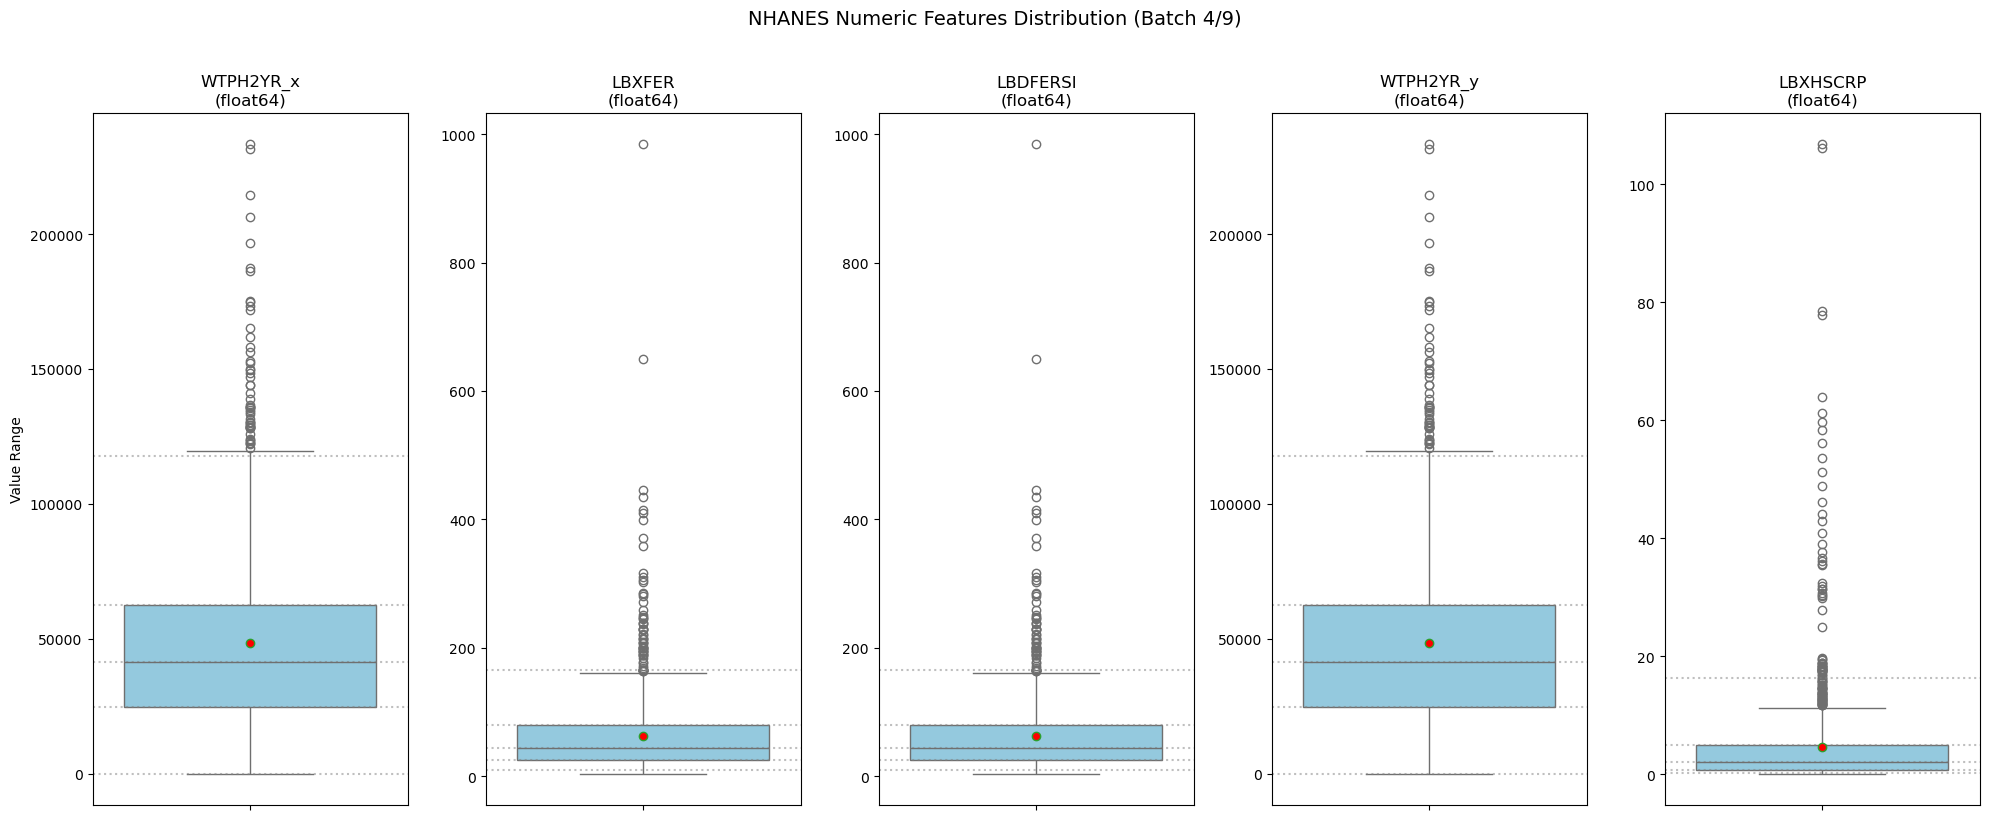


📈 Statistical Summary for Batch 4:
                   mean           std           min           25%  \
WTPH2YR_x  48387.528623  34585.579017  5.397605e-79  24625.776025   
LBXFER        62.476966     65.809256  3.730000e+00     25.325000   
LBDFERSI      62.476966     65.809256  3.730000e+00     25.325000   
WTPH2YR_y  48387.528623  34585.579017  5.397605e-79  24625.776025   
LBXHSCRP       4.693219      8.961706  1.100000e-01      0.812500   

                    50%           75%            max  
WTPH2YR_x  41462.776665  62642.651181  233237.337648  
LBXFER        43.400000     79.775000     984.000000  
LBDFERSI      43.400000     79.775000     984.000000  
WTPH2YR_y  41462.776665  62642.651181  233237.337648  
LBXHSCRP       2.050000      5.047500     106.780000  


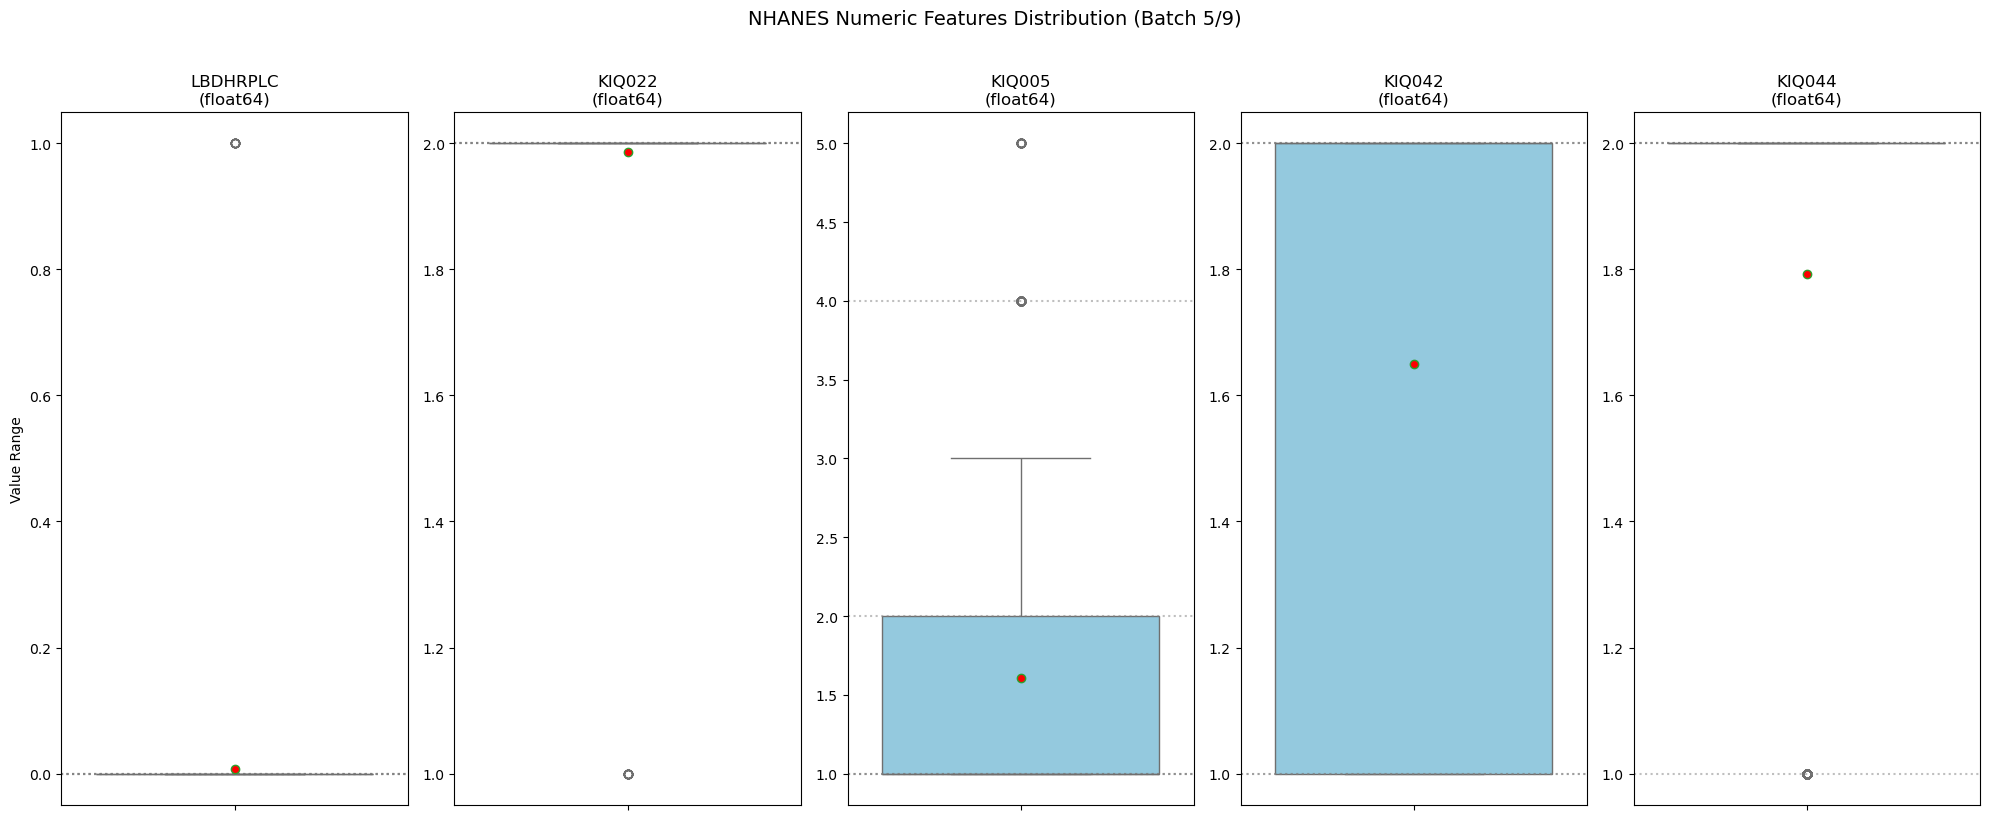


📈 Statistical Summary for Batch 5:
              mean       std           min           25%           50%  \
LBDHRPLC  0.007937  0.088772  5.397605e-79  5.397605e-79  5.397605e-79   
KIQ022    1.986772  0.114298  1.000000e+00  2.000000e+00  2.000000e+00   
KIQ005    1.604938  1.048267  1.000000e+00  1.000000e+00  1.000000e+00   
KIQ042    1.649912  0.477208  1.000000e+00  1.000000e+00  2.000000e+00   
KIQ044    1.792769  0.405501  1.000000e+00  2.000000e+00  2.000000e+00   

                   75%  max  
LBDHRPLC  5.397605e-79  1.0  
KIQ022    2.000000e+00  2.0  
KIQ005    2.000000e+00  5.0  
KIQ042    2.000000e+00  2.0  
KIQ044    2.000000e+00  2.0  


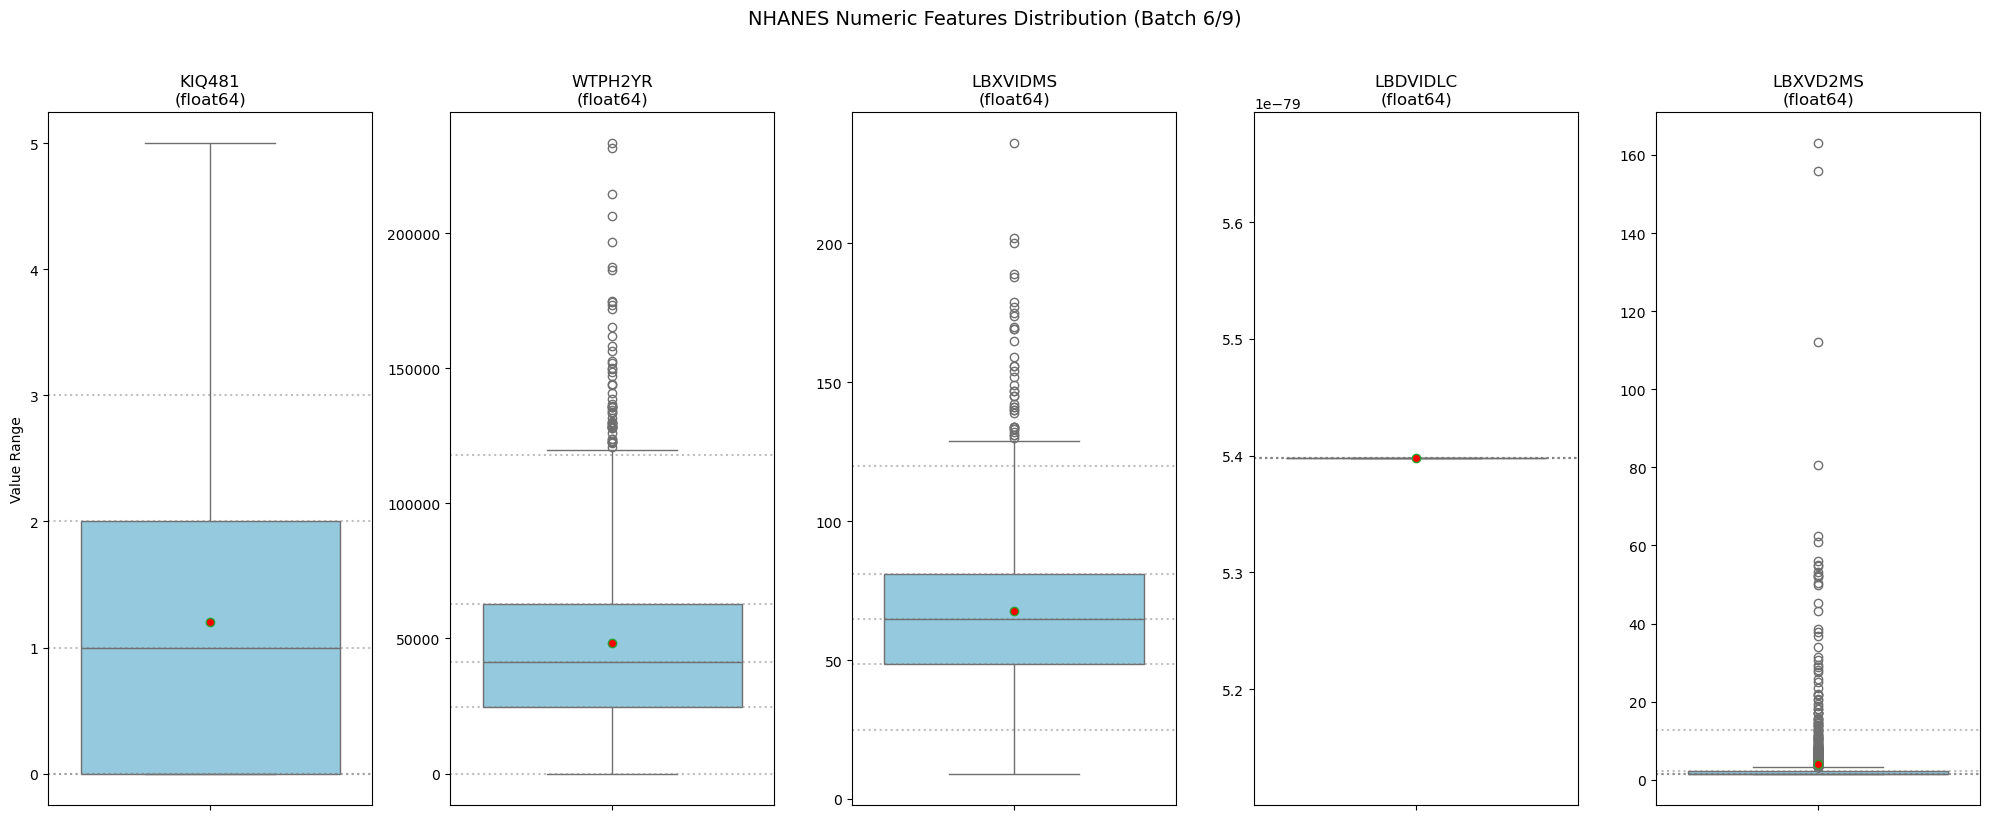


📈 Statistical Summary for Batch 6:
                  mean           std           min           25%  \
KIQ481    1.204586e+00      1.153886  5.397605e-79  5.397605e-79   
WTPH2YR   4.838753e+04  34585.579017  5.397605e-79  2.462578e+04   
LBXVIDMS  6.754967e+01     29.259427  9.130000e+00  4.852500e+01   
LBDVIDLC  5.397605e-79      0.000000  5.397605e-79  5.397605e-79   
LBXVD2MS  3.993986e+00     10.208979  1.570000e+00  1.570000e+00   

                   50%           75%           max  
KIQ481    1.000000e+00  2.000000e+00  5.000000e+00  
WTPH2YR   4.146278e+04  6.264265e+04  2.332373e+05  
LBXVIDMS  6.490000e+01  8.087500e+01  2.360000e+02  
LBDVIDLC  5.397605e-79  5.397605e-79  5.397605e-79  
LBXVD2MS  1.570000e+00  2.262500e+00  1.630000e+02  


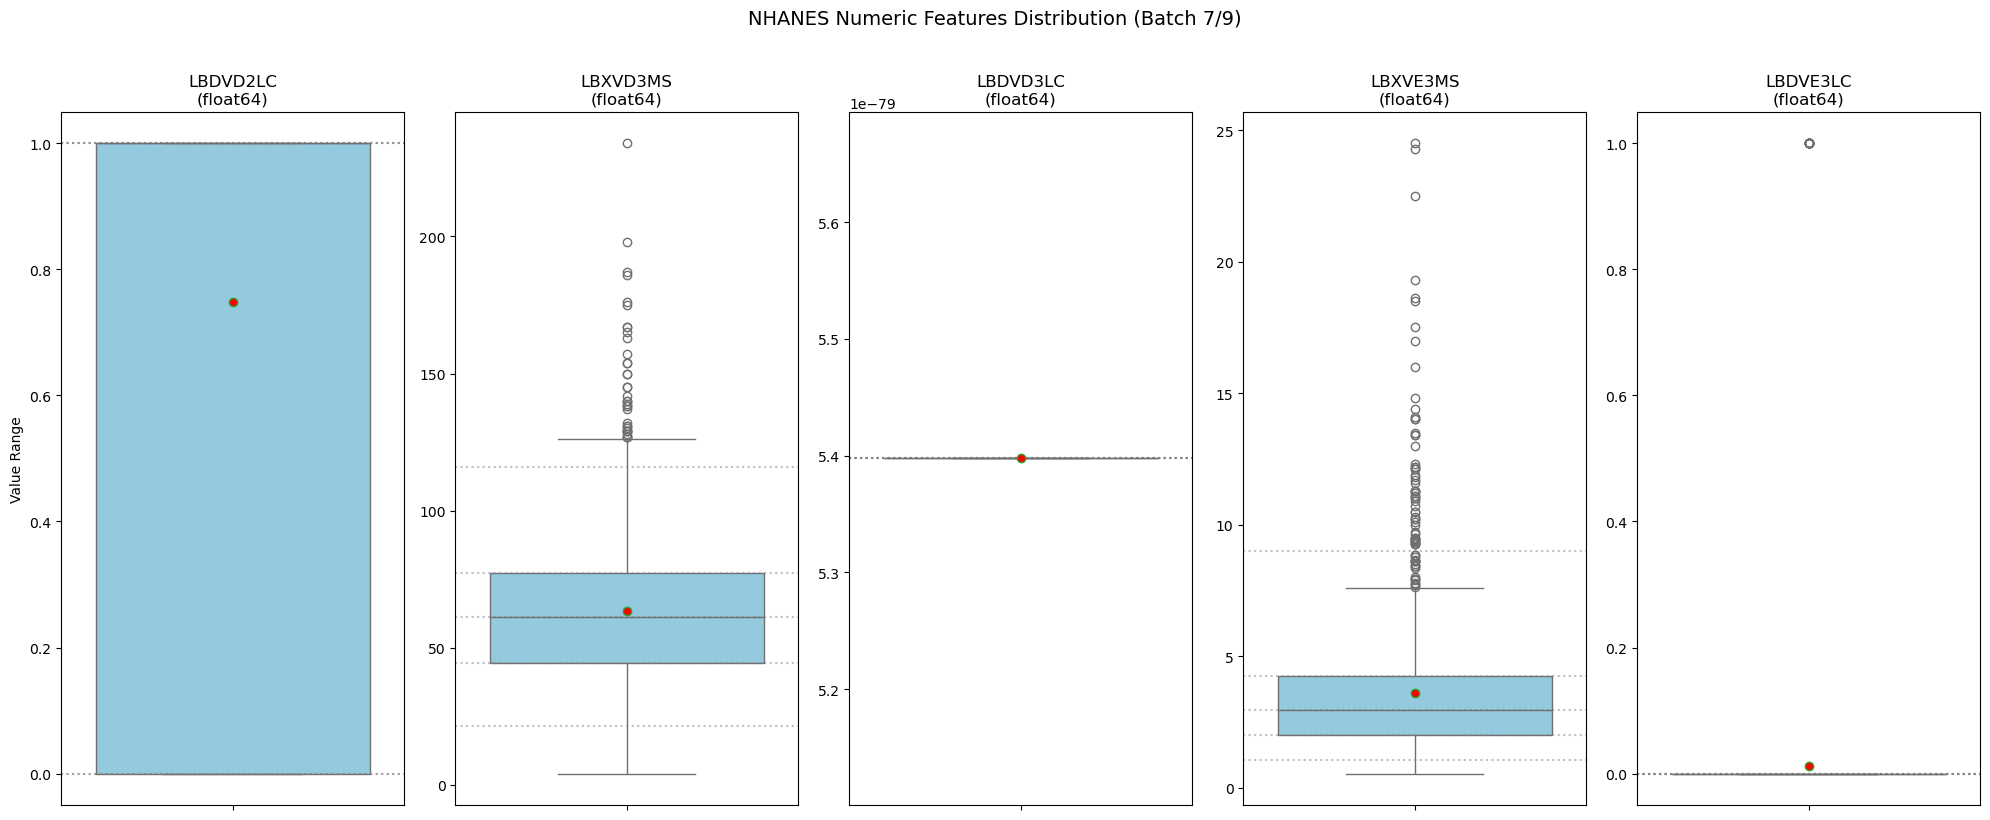


📈 Statistical Summary for Batch 7:
                  mean        std           min           25%           50%  \
LBDVD2LC  7.477954e-01   0.434470  5.397605e-79  5.397605e-79  1.000000e+00   
LBXVD3MS  6.335474e+01  29.057792  4.100000e+00  4.430000e+01  6.130000e+01   
LBDVD3LC  5.397605e-79   0.000000  5.397605e-79  5.397605e-79  5.397605e-79   
LBXVE3MS  3.620600e+00   2.737835  5.400000e-01  1.992500e+00  2.940000e+00   
LBDVE3LC  1.234568e-02   0.110472  5.397605e-79  5.397605e-79  5.397605e-79   

                   75%           max  
LBDVD2LC  1.000000e+00  1.000000e+00  
LBXVD3MS  7.730000e+01  2.340000e+02  
LBDVD3LC  5.397605e-79  5.397605e-79  
LBXVE3MS  4.240000e+00  2.450000e+01  
LBDVE3LC  5.397605e-79  1.000000e+00  


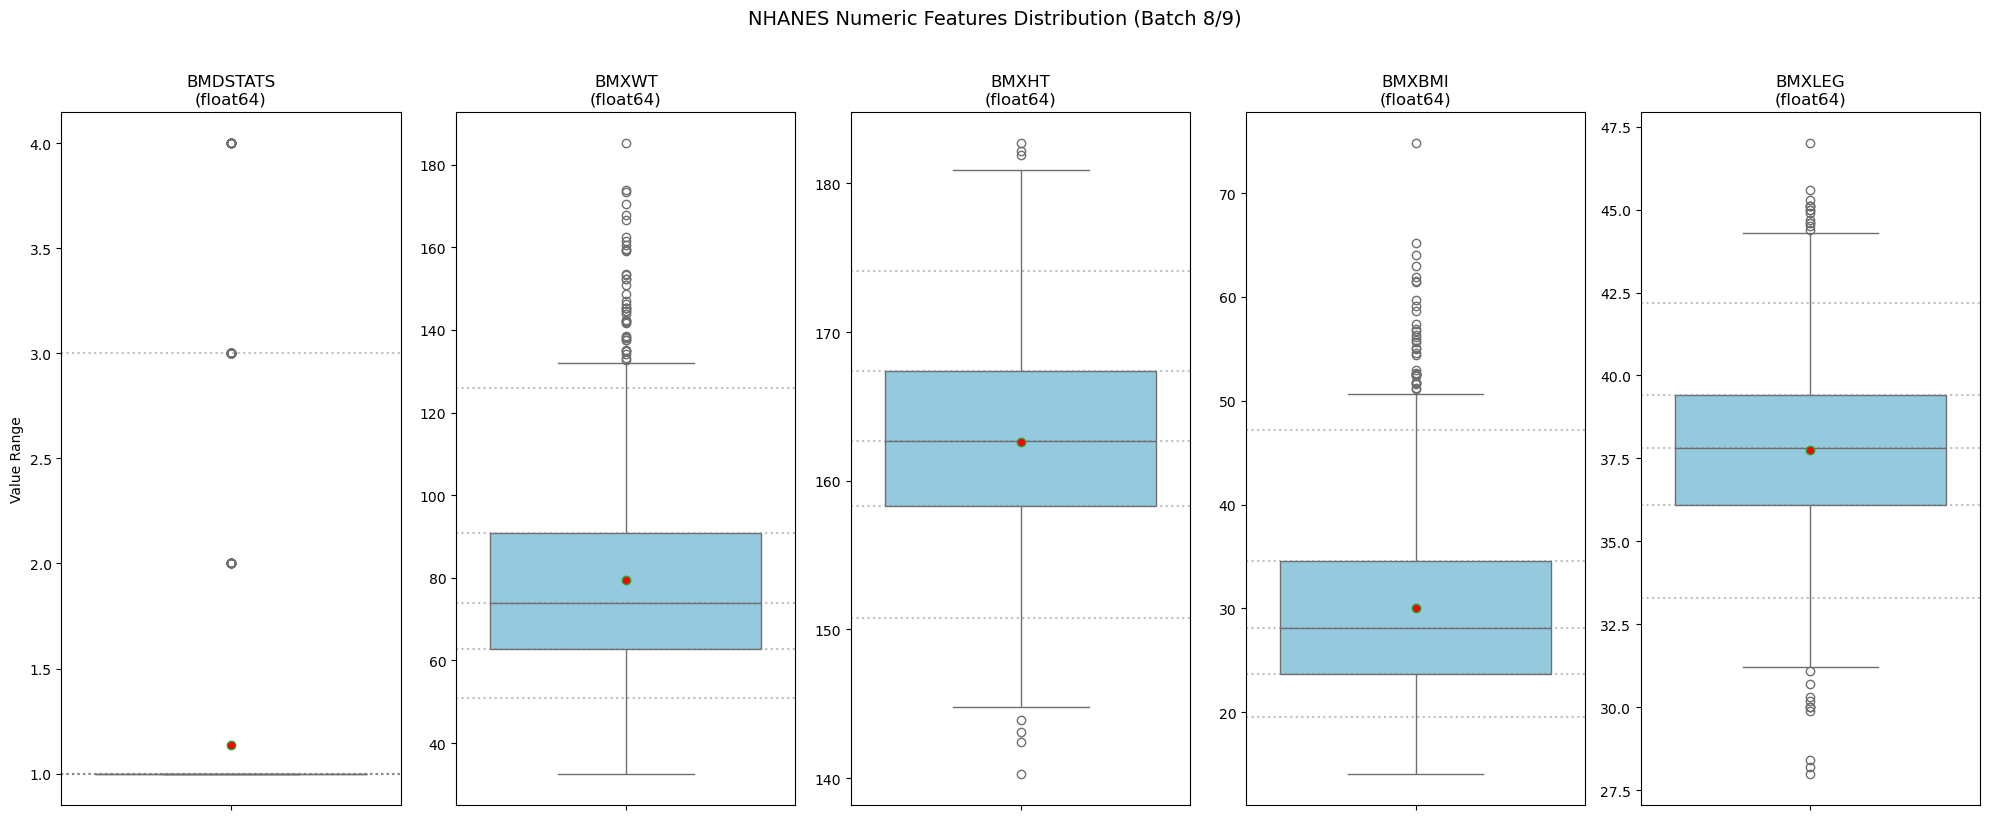


📈 Statistical Summary for Batch 8:
                mean        std    min      25%    50%      75%    max
BMDSTATS    1.136684   0.521230    1.0    1.000    1.0    1.000    4.0
BMXWT      79.526340  23.704486   32.6   62.800   73.8   90.750  185.2
BMXHT     162.616138   6.891070  140.3  158.300  162.7  167.375  182.7
BMXBMI     30.027954   8.621479   14.1   23.725   28.1   34.575   74.8
BMXLEG     37.763139   2.684383   28.0   36.100   37.8   39.400   47.0


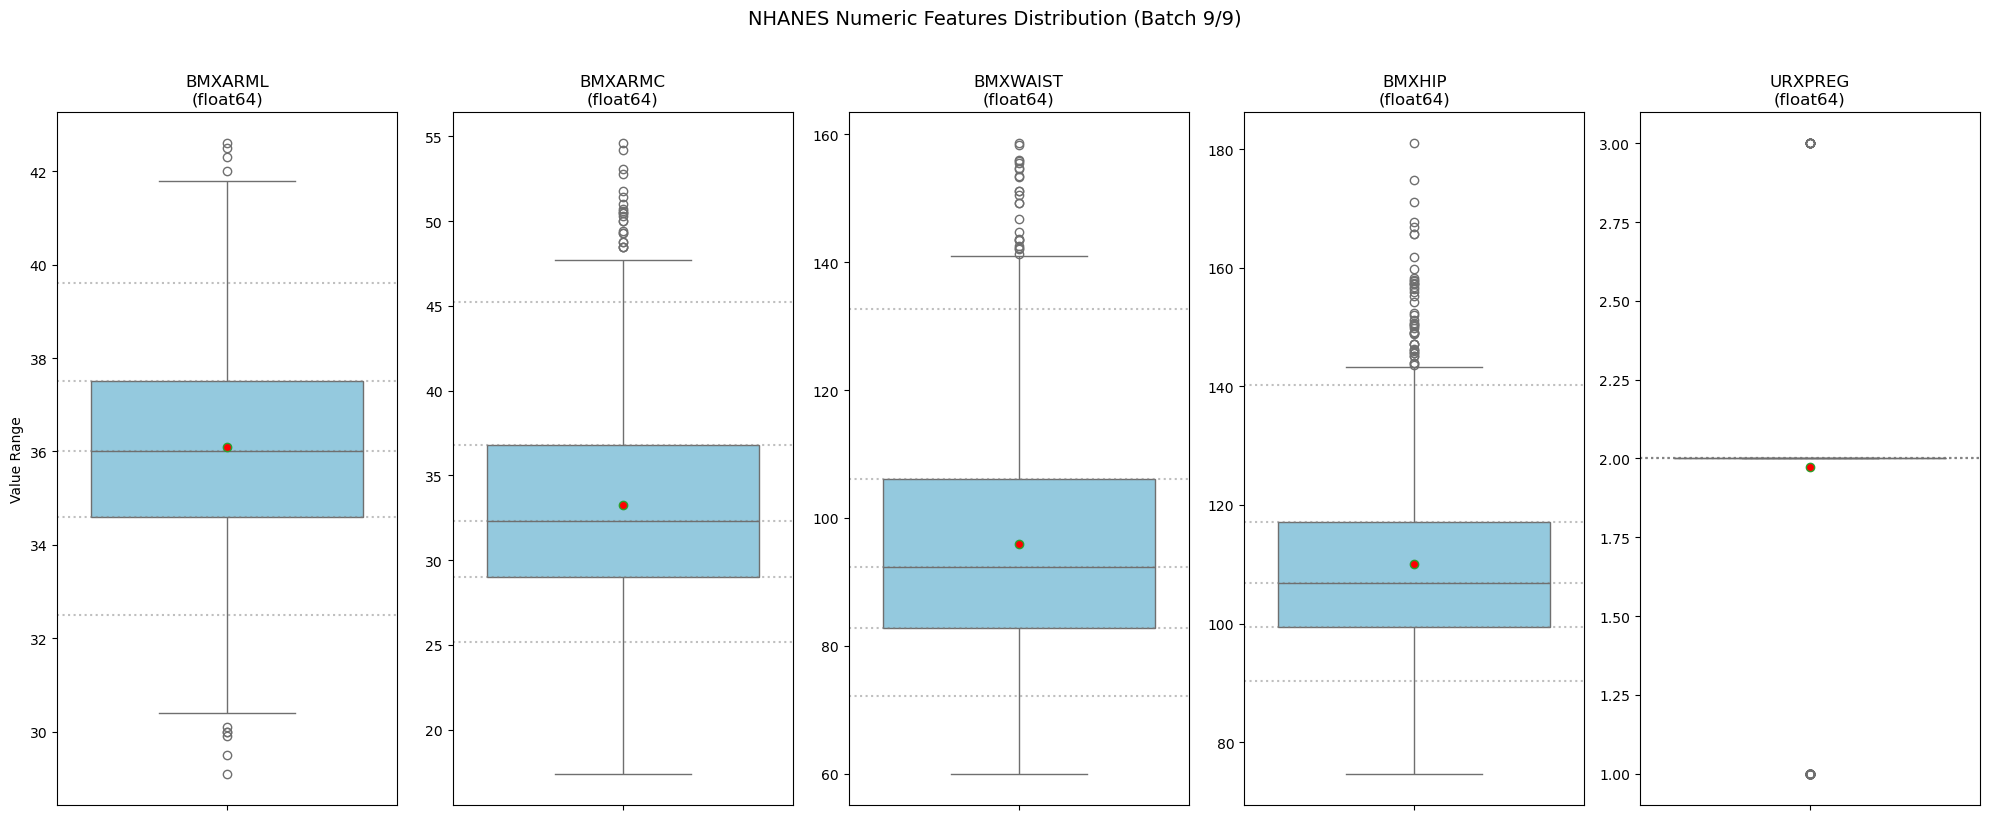


📈 Statistical Summary for Batch 9:
                mean        std   min   25%    50%      75%    max
BMXARML    36.100882   2.200116  29.1  34.6   36.0   37.500   42.6
BMXARMC    33.264021   6.044154  17.4  29.0   32.3   36.775   54.6
BMXWAIST   95.906878  18.297704  60.0  82.8   92.3  106.075  158.6
BMXHIP    110.027954  15.554229  74.7  99.4  106.8  117.075  181.0
URXPREG     1.973545   0.212592   1.0   2.0    2.0    2.000    3.0

🔍 NHANES Data Visualization Tips:
- Consider applying survey weights to percentiles
- Check for biologically implausible values (e.g., BMI > 70)
- Note any variables requiring log transformation
- Compare distributions with NHANES population tables


In [71]:
# Step 1: Selecting only numeric columns from NHANES data
# Exclude SEQN (participant ID) and survey weights if present
numeric_features = [col for col in x.select_dtypes(include=['int64', 'float64']).columns 
                   if col not in ['SEQN', 'SDMVPSU', 'SDMVSTRA', 'WTMEC2YR']]

print(f"📊 Found {len(numeric_features)} numeric features for visualization")

# Step 2: Plotting in batches with NHANES-specific enhancements
batch_size = 5  # Optimal for viewing multiple boxplots
num_batches = (len(numeric_features) + batch_size - 1) // batch_size  # Ceiling division

for batch_idx in range(num_batches):
    start = batch_idx * batch_size
    end = start + batch_size
    current_features = numeric_features[start:end]
    
    plt.figure(figsize=(20, 8))
    
    for i, feature in enumerate(current_features):
        plt.subplot(1, batch_size, i + 1)
        
        # NHANES-specific visualization enhancements:
        sns.boxplot(y=x[feature], color='skyblue', showmeans=True,
                   meanprops={'marker':'o', 'markerfacecolor':'red'})
        
        # Add NHANES-specific percentiles
        percentiles = x[feature].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
        for p in percentiles:
            plt.axhline(p, color='gray', linestyle=':', alpha=0.5)
        
        plt.title(f"{feature}\n({x[feature].dtype})", fontsize=12)
        plt.ylabel('Value Range' if i == 0 else '')
        
        # Add NHANES variable description if available
        # (Consider adding a dictionary with variable descriptions)
        
    plt.suptitle(f"NHANES Numeric Features Distribution (Batch {batch_idx + 1}/{num_batches})", 
                 y=1.02, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Print statistical summary for the current batch
    print(f"\n📈 Statistical Summary for Batch {batch_idx + 1}:")
    print(x[current_features].describe().transpose()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])

# NHANES-Specific Recommendations
print("\n🔍 NHANES Data Visualization Tips:")
print("- Consider applying survey weights to percentiles")
print("- Check for biologically implausible values (e.g., BMI > 70)")
print("- Note any variables requiring log transformation")
print("- Compare distributions with NHANES population tables")